In [29]:
import matplotlib.pyplot as plotter
from scipy import stats
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
"""
Loading data, CSV file format into seperate numpy arrays
"""
TSLA_stock_data =  pd.read_csv('data/TSLA_stock_data.csv')

# Assuming the data is not perfect, let's check if there are any missing values
TSLA_stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
# We need to check the data type for all the columns
print("Data type for all the columns: ")
TSLA_stock_data.info()


Data type for all the columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [32]:
# We will see the data type for the first column is categorical so we will drop it 
TSLA_stock_data = TSLA_stock_data.drop(['Date'], axis=1)
# Let's print the info again to make sure the first column was dropped
print("Data Type for the remaining columns:")
TSLA_stock_data.info()

Data Type for the remaining columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 113.4 KB


# Data
We have changed the data a good bit now, so let's check it again 

In [33]:
TSLA_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900


'Adj Close' and 'Close' columns are the same values so we can drop one

In [34]:
TSLA_stock_data = TSLA_stock_data.drop(['Adj Close'], axis=1)
TSLA_stock_data.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


# Some definitions
<strong>Target variable</strong> -- The “target variable” is the variable whose values are to be modeled and predicted by other variables. It is analogous to the dependent variable (i.e., the variable on the left of the equal sign) in linear regression. There must be one and only one target variable in a decision tree analysis

A linear regression model predicts the target as a weighted sum of the feature inputs. The linearity of the learned relationship makes the interpretation easy. Linear regression models have long been used by statisticians, computer scientists and other people who tackle quantitative problems.

In [35]:
""" 
- Now that we have our data in the right formats and the data we want.
- We will now split the data into training and testing data. 
"""
# Target Variable, we will use the high of the day as our target variable
target = TSLA_stock_data['High']

# features, we will use the rest of the data as our features
features = TSLA_stock_data.drop(['High'], axis=1)

# We will use 20% of the data as our testing data. Leaving us with 80% of the data for training
xTrain,xTest,yTrain,yTest = train_test_split(features,target, test_size=0.2)
# Notice no random state is specified here

In [38]:
# Create a Linear Regression model and train our model
model = LinearRegression()
model.fit(xTrain, yTrain)

# Let's see how well our model did using the score method
print(f"Score: {model.score(xTest, yTest)}")

Score: 0.999803851997443


# Some more definitions

P-values and coefficients in regression analysis work together to tell you which relationships in your model are statistically significant and the nature of those relationships. The coefficients describe the mathematical relationship between each independent variable and the dependent variable. The p-values for the coefficients indicate whether these relationships are statistically significant.
- https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

Now that we have an understanding of what P-values and coeffiecents are. Let's check what our values may be

In [40]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: -0.21182133676549597
Coefficients: [ 5.76044711e-01 -2.93615089e-01  7.24289957e-01  2.12524112e-07]


Now that we know our correlations we can go ahead and run a prediction

In [42]:
predictions = model.predict(xTest)

# After prediction we need to create a prediction plot to see how close our model prediction may be as compared to the actual values
ourComparisonPlot = pd.DataFrame({'Actual': yTest, 'Our Prediction': predictions})

# Now we can print the first 20 rows of our comparison plot
ourComparisonPlot.head(20)

,Actual,Our Prediction
1411,173.000000,171.925063
2400,484.940002,487.308739
235,31.500000,31.521534
931,247.500000,242.266976
871,148.240005,148.686583
1235,249.500000,250.779244
1694,255.070007,256.708348
404,31.330000,31.147949
131,26.950001,27.074830
683,36.060001,35.608014


What if we wanted to plot the data?

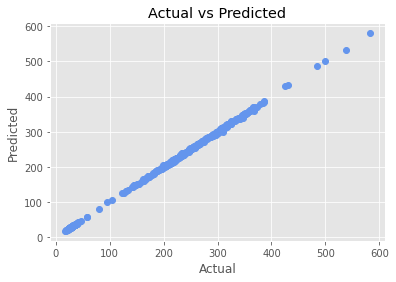

In [44]:
# We want to at least look good
plotter.style.use('ggplot')

# Let's plot
plotter.plot(ourComparisonPlot['Actual'], ourComparisonPlot['Our Prediction'], 'o', color="cornflowerblue")
plotter.xlabel('Actual')
plotter.ylabel('Predicted')
plotter.title('Actual vs Predicted')
plotter.show()

The above graph shows a very close relation between our actual and predicted values